# Segmented regressions with exponential sampling and heteroscedastic noise (real data)

In [1]:
%load_ext autoreload
%autoreload 2
from pytree import *
import random
import matplotlib.pyplot as plt
import numpy

print(__version__)
print(__git_version__)

0.0.6
574b435c98866dec4200ae171284b356d12ce7e4


In [2]:
import pandas
df = pandas.read_csv('test_data/memcpy.csv')
df = df.groupby('size').mean().reset_index()
df

,size,duration
0,1,4.740200e-08
1,2,4.602400e-08
2,3,4.823600e-08
3,4,4.604000e-08
4,5,4.641400e-08
...,...,...
823,961735315,1.909445e-01
824,961787328,1.909646e-01
825,984583538,1.954907e-01
826,984896479,1.955444e-01


## Top-down

Here, this is the usual stuff, we add breakpoints using a tree-like approach.

11
x ≤ 7.345e+06?
    └──x ≤ 1.107e+06?
    │    └──x ≤ 7.624e+05?
    │    │    └──x ≤ 4.772e+05?
    │    │    │    └──x ≤ 1.600e+04?
    │    │    │    │    └──x ≤ 1.264e+04?
    │    │    │    │    │    └──y ~ 1.547e-11x + 4.431e-08
    │    │    │    │    │    └──x ≤ 1.358e+04?
    │    │    │    │    │         └──y ~ -3.317e-12x + 3.148e-07
    │    │    │    │    │         └──y ~ 9.316e-11x + -9.813e-07
    │    │    │    │    └──y ~ 5.309e-11x + -9.811e-08
    │    │    │    └──y ~ 5.719e-11x + -1.080e-06
    │    │    └──y ~ 9.029e-11x + -2.786e-05
    │    └──y ~ 9.676e-11x + -2.497e-05
    └──x ≤ 2.761e+07?
         └──x ≤ 1.808e+07?
         │    └──y ~ 1.854e-10x + -9.013e-06
         │    └──y ~ 1.903e-10x + -9.998e-05
         └──x ≤ 6.123e+08?
              └──x ≤ 2.678e+08?
              │    └──y ~ 1.986e-10x + -3.274e-04
              │    └──y ~ 1.989e-10x + -3.974e-04
              └──y ~ 1.993e-10x + -7.268e-04
CPU times: user 418 ms, sys: 10.6 ms, total: 428 ms
W

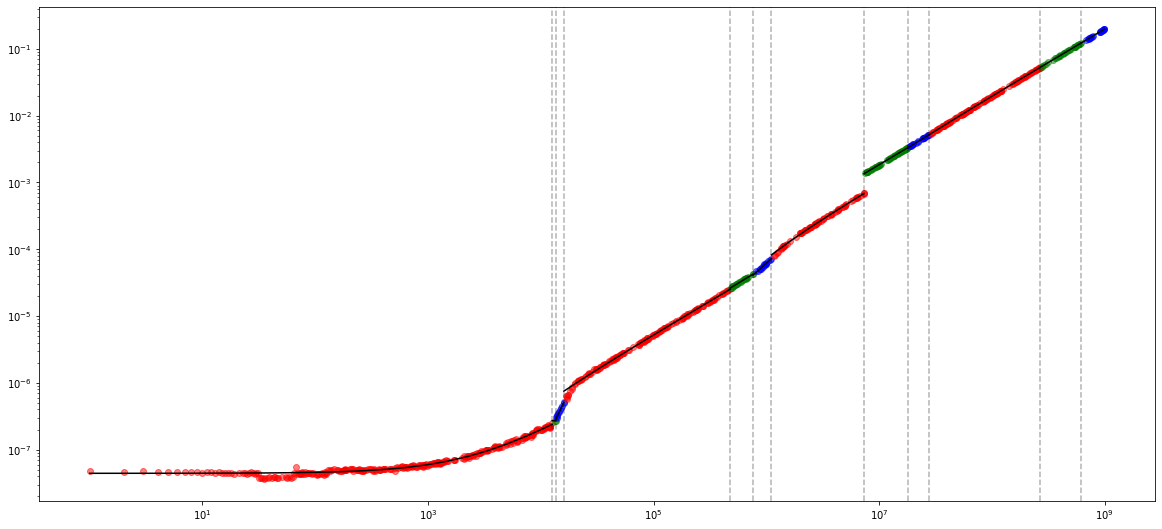

In [3]:
%%time
reg = compute_regression(df['size'], df['duration'])
print(len(reg.breakpoints))
print(reg)
reg.plot_dataset(log=True)

## Bottom-up (classical)

Here we remove breakpoints greedily, using the BIC.

In [4]:
%%time
reg.simplify()

CPU times: user 275 ms, sys: 0 ns, total: 275 ms
Wall time: 274 ms


,regression,RSS,BIC,AIC,BIClog,RSSlog,nb_breakpoints
0,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",7.088925e-09,-20784.747433,-21006.541051,1447.857091,1.367226,11
1,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",7.088926e-09,-20811.623451,-21014.541017,1424.298060,1.371232,10
2,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",7.089055e-09,-20838.484370,-21022.525883,3468.722765,3.872803,9
3,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",7.094895e-09,-20864.678583,-21029.844044,inf,inf,8
4,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",7.114539e-09,-20889.265349,-21035.554756,inf,inf,7
5,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",7.477664e-09,-20874.923528,-21002.336883,inf,inf,6
6,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",1.138660e-08,-20553.611449,-20662.148752,inf,inf,5
7,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",3.676109e-08,-19610.069447,-19699.730697,inf,inf,4
8,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",6.892215e-08,-19116.516319,-19187.301517,inf,inf,3
9,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",1.746078e-07,-18373.712596,-18425.621741,inf,inf,2


-inf < x ≤ 1.107e+06
	y ~ 5.845e-11x + -3.036e-07
1.107e+06 < x ≤ 7.345e+06
	y ~ 9.676e-11x + -2.497e-05
7.345e+06 < x ≤ 1.808e+07
	y ~ 1.854e-10x + -9.013e-06
1.808e+07 < x ≤ 2.761e+07
	y ~ 1.903e-10x + -9.998e-05
2.761e+07 < x ≤ 2.678e+08
	y ~ 1.986e-10x + -3.274e-04
2.678e+08 < x ≤ 6.123e+08
	y ~ 1.989e-10x + -3.974e-04
6.123e+08 < x ≤ inf
	y ~ 1.993e-10x + -7.268e-04
CPU times: user 250 ms, sys: 15.5 ms, total: 265 ms
Wall time: 250 ms


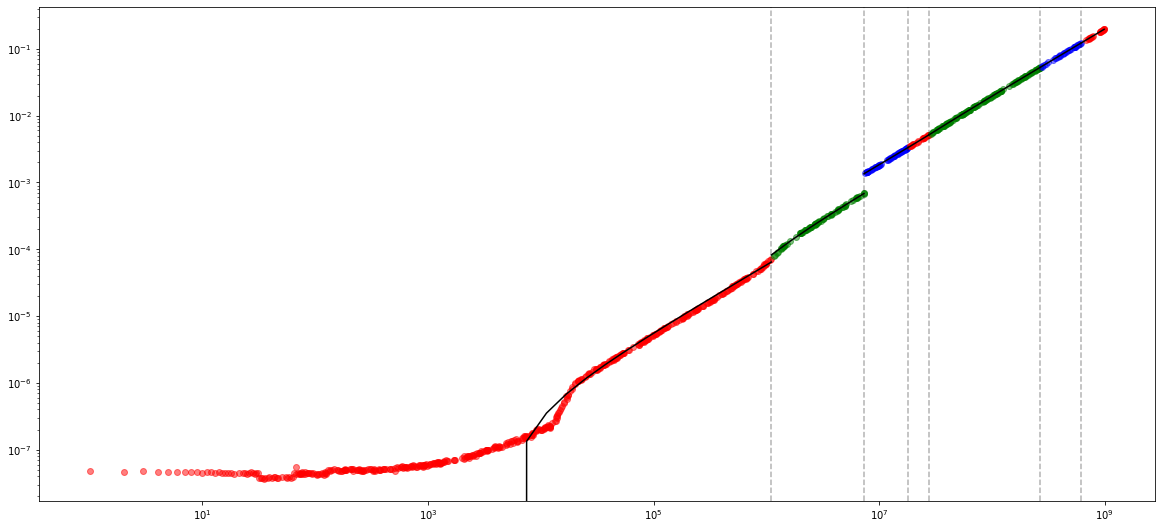

In [5]:
%%time
auto_simple = reg.auto_simplify()
print(auto_simple)
auto_simple.plot_dataset(log=True)

## Bottom-up (log)

Same algorithm as above, we remove breakpoints, but this time we changed the formula for the error.

Now, we define (with $N$ the number of points and $P$ the number of model parameters):

$$\text{RSSlog} = \sum_i \left(\log(y_i) - \log(\alpha x_i + \beta)\right)^2$$

$$\text{BIClog} = P\log(N) + N \text{RSSlog}$$

In the following simplification, we minimize this BIClog value instead of minimizing the BIC value.

In [6]:
%%time
reg.simplify(RSSlog=True)

CPU times: user 371 ms, sys: 0 ns, total: 371 ms
Wall time: 371 ms


,regression,RSS,BIC,AIC,BIClog,RSSlog,nb_breakpoints
0,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",7.088925e-09,-20784.747433,-21006.541051,1447.857091,1.367226,11
1,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",7.088926e-09,-20811.623417,-21014.540983,1419.858631,1.365871,10
2,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",3.622845e-08,-19487.774137,-19671.815650,1392.984180,1.365873,9
3,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",1.381491e-07,-18406.381319,-18571.546780,1366.421671,1.366251,8
4,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",1.420580e-07,-18410.154382,-18556.443789,1340.007593,1.366809,7
5,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",1.421245e-07,-18436.642992,-18564.056347,1343.167505,1.403085,6
6,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",1.450376e-06,-16540.178750,-16648.716052,1594.751382,1.739389,5
7,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",1.451647e-06,-16566.329530,-16655.990780,2199.379305,2.502075,4
8,"((1, 4.7402000000000056e-08), (2, 4.6024000000...",1.451648e-06,-16593.205509,-16663.990707,4248.243438,5.009008,3
9,"((16888, 6.370399999999994e-07), (16918, 5.673...",1.065810e-05,-14969.363158,-15021.272303,inf,inf,2


-inf < x ≤ 1.358e+04
	y ~ 1.559e-11x + 4.415e-08
1.358e+04 < x ≤ 1.600e+04
	y ~ 9.316e-11x + -9.813e-07
1.600e+04 < x ≤ 4.772e+05
	y ~ 5.309e-11x + -9.811e-08
4.772e+05 < x ≤ 1.107e+06
	y ~ 7.006e-11x + -8.691e-06
1.107e+06 < x ≤ 7.345e+06
	y ~ 9.676e-11x + -2.497e-05
7.345e+06 < x ≤ 2.761e+07
	y ~ 1.871e-10x + -2.917e-05
2.761e+07 < x ≤ inf
	y ~ 1.988e-10x + -3.589e-04
CPU times: user 438 ms, sys: 7.99 ms, total: 446 ms
Wall time: 437 ms


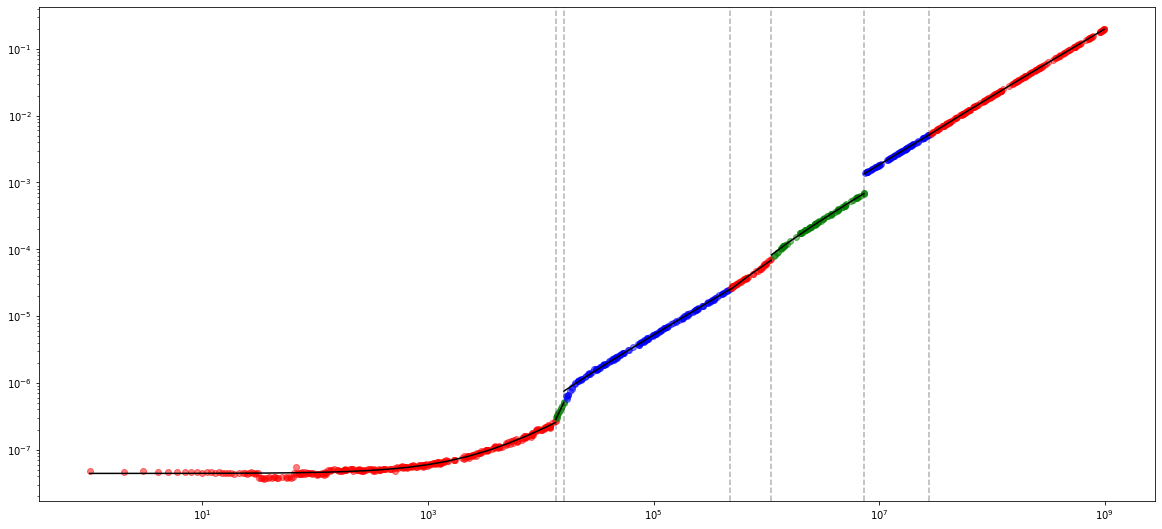

In [7]:
%%time
auto_simple = reg.auto_simplify(RSSlog=True)
print(auto_simple)
auto_simple.plot_dataset(log=True)

In [8]:
import pandas
segments = []
for i, seg in enumerate(auto_simple.segments):
    segments.append({
        'min_x': seg[0][0],
        'max_x': seg[0][1],
        'RSS': seg[1].RSS,
        'RSSlog': seg[1].compute_RSSlog()
    })
pandas.DataFrame(segments)

,min_x,max_x,RSS,RSSlog
0,-inf,13581.0,5.103158e-15,0.865974
1,13581.0,16000.0,1.356306e-15,0.013817
2,16000.0,477185.0,2.492664e-12,0.430573
3,477185.0,1106501.0,7.710187e-11,0.042153
4,1106501.0,7344568.0,1.164938e-09,0.049576
5,7344568.0,27608546.0,4.312762e-09,0.000607
6,27608546.0,inf,1.365672e-07,0.000385
